In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Find the most recent date in the data set.
most_recent = session.query(measure.date).order_by(measure.date.desc()).first()
most_recent

('2017-08-23',)

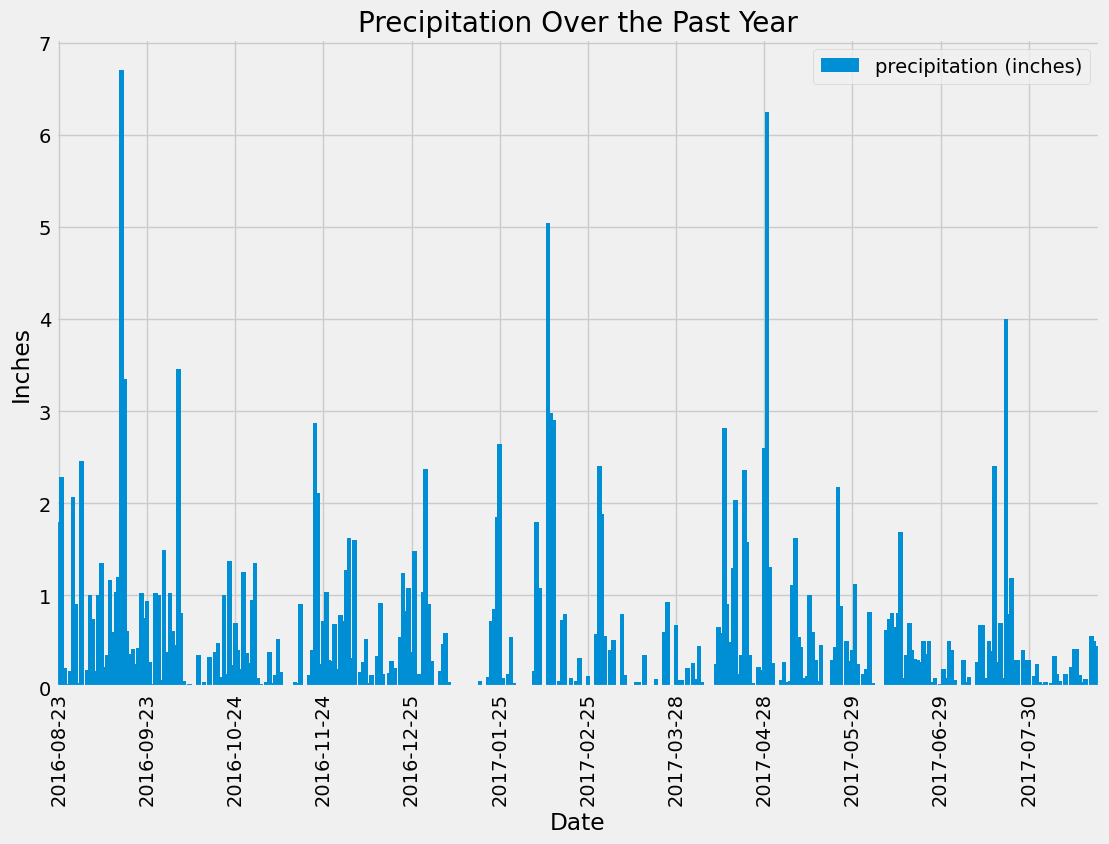

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results=session.query(measure.date, measure.prcp).filter(measure.date >=last_year).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=["date", "precipitation (inches)"])
df = df.set_index("date")

# Sort the dataframe by date
sum_df = df.groupby("date").max()

# Use Pandas Plotting with Matplotlib to plot the data
sum_df.plot.bar(
    rot="vertical",
    grid=True,
    title="Precipitation Over the Past Year",
    xlabel="Date",
    ylabel="Inches",
    legend=True,
    align="center",
    figsize=(12,8),
    width=1.6
)
plt.locator_params(nbins=12)
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation (inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.station)).group_by(
    measure.station).order_by(func.count(measure.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).filter(
    measure.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

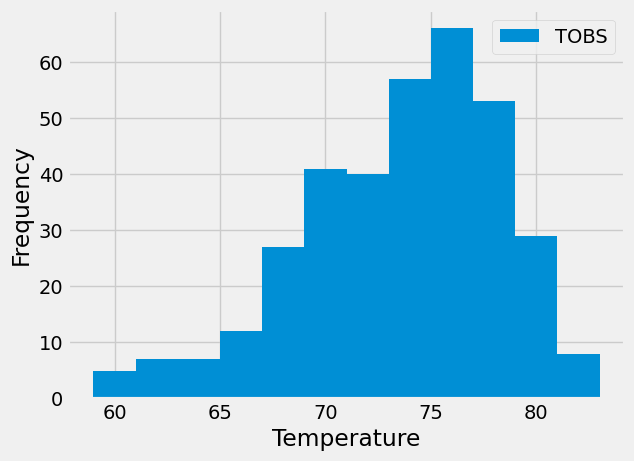

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table
last_year=dt.date(2017,8,23)-dt.timedelta(days=365)
results=session.query(measure.tobs).filter(measure.station=='USC00519281').filter(
    measure.date >=last_year).all()
df=pd.DataFrame(results, columns=['TOBS'])
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.savefig("temperature.png")

# Close session

In [16]:
# Close Session
session.close()